<a href="https://colab.research.google.com/github/BagusDAriAwan/creditcard-fraud/blob/master/kmeans_ifo_creditcard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import math
import random as rn
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb
sb.set_style(style="whitegrid")
sb.set_color_codes()
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.decomposition import PCA
from sklearn.preprocessing import Normalizer, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.externals import joblib
import time

In [231]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
df=pd.read_csv("drive/My Drive/Colab Notebooks/ULB/creditcard.csv")
y=df['Class']

In [233]:
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,1.341262,0.359894,-0.358091,-0.137134,0.517617,0.401726,-0.058133,0.068653,-0.033194,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,-1.416907,-0.153826,-0.751063,0.167372,0.050144,-0.443587,0.002821,-0.611987,-0.045575,-0.219633,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,-0.619468,0.291474,1.757964,-1.323865,0.686133,-0.076127,-1.222127,-0.358222,0.324505,-0.156742,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,-0.705117,-0.110452,-0.286254,0.074355,-0.328783,-0.210077,-0.499768,0.118765,0.570328,0.052736,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,-0.366846,1.017614,0.836390,1.006844,-0.443523,0.150219,0.739453,-0.540980,0.476677,0.451773,0.203711,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [234]:
yab = y[y==1]
th = len(yab)/len(y)
th

0.001727485630620034

In [235]:
df_data=df.drop(['Class'], axis=1)
df_data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000


In [236]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

## split data

In [0]:
X_train, X_test, y_train, y_test = train_test_split(df_data, y, test_size=0.2, random_state=1, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1, stratify=y_train)

In [238]:
X_train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
65782,51742.0,1.217770,0.077244,0.498321,0.520815,-0.574932,-0.708602,-0.159101,0.039746,0.046620,0.154164,1.187396,0.140420,-1.493653,0.778755,0.520577,0.580438,-0.575816,0.164916,0.183084,-0.194239,-0.226154,-0.773018,0.145243,0.276868,0.129511,0.083098,-0.043997,0.004983,0.99
86825,61413.0,0.665294,-0.779358,1.680700,3.158373,-1.445562,0.721120,-0.733349,0.351817,0.947691,0.243382,-1.658432,-0.199440,-1.251737,-0.703287,-1.443037,0.238003,0.082585,-0.091704,-0.587019,0.173780,0.046143,-0.017651,-0.209463,0.385115,0.296200,0.082171,0.025492,0.071064,214.04
117627,74745.0,1.272176,0.169925,-0.179971,1.062221,0.521140,0.614676,0.017768,0.087789,0.419398,-0.114285,-1.824942,-0.045081,-0.098062,0.022784,0.031038,-0.305480,-0.233495,-0.496386,0.162940,-0.167845,-0.199115,-0.329121,-0.228425,-1.313537,0.844641,-0.224776,0.037536,0.000581,3.76
225290,144191.0,-7.725336,-2.354526,-4.607707,0.164617,-6.985642,5.637628,5.313883,0.660609,0.064677,-1.277915,0.514201,0.567617,0.595351,0.737138,1.407868,1.836046,-0.185454,-0.439954,-0.642606,-5.028523,-1.073901,1.173600,-0.183291,-0.584831,0.008990,0.618218,-0.579530,-0.606947,1395.00
125927,77866.0,-0.517416,0.313686,1.537756,-1.558396,0.700028,1.288011,0.271898,0.507856,0.038740,-0.460233,2.212832,0.732872,-0.618835,0.113776,0.984074,-0.480702,0.180416,-1.792959,-2.015641,-0.062246,0.010926,0.338478,0.066529,-0.989922,-0.638208,0.806935,0.075750,-0.181417,7.68


In [239]:
print(len(X_train),len(X_val),len(X_test))

170883 56962 56962


In [240]:
ytrain_ab = y_train[y_train==1]
yval_ab = y_val[y_val==1]
ytest_ab = y_test[y_test==1]
print('fraud total =',len(yab),'fraud train =',len(ytrain_ab),'fraud val =',len(yval_ab),'fraud test =',len(ytest_ab))

fraud total = 492 fraud train = 295 fraud val = 99 fraud test = 98


In [0]:
def confussion_matrik(actual,predict):
    TP,FP,FN,TN = 0,0,0,0
    for i,val in enumerate(actual):
        if val == 0:
            if val == predict[i]:
                TN += 1
            else:
                FP += 1
        if val == 1:
            if val == predict[i]:
                TP += 1
            else:
                FN += 1
    return TP,FP,FN,TN
 
def acc_sens_spec(actual,predict):
    TP,FP,FN,TN = confussion_matrik(actual,predict)
# akurasi
    if (TP+FP+FN+TN) == 0 :
        accuracy = 0 
    else :
        accuracy = (TP+TN)/(TP+FP+FN+TN)
        
# sensitivity
    if (TP+FN) == 0 :
        sensitivity = 0
    else :
        sensitivity = TP/(TP+FN)
        
# specifity    
    if (TN +FP) == 0 :
        specifity = 0
    else :
        specifity = TN/(TN +FP)
        
# precision
    if (TP+FP) == 0 :
        precision = 0
    else :
        precision = TP/(TP+FP)

# recall
    recall = sensitivity

# f1_score
    if (precision+recall) == 0 :
        f1_score = 0
    else :
        f1_score = 2*((precision*recall)/(precision+recall))  
    
    return accuracy,sensitivity,specifity,precision,recall,f1_score


In [0]:
def convert(y):
    for i in range(y.shape[0]):
        if y[i]==-1:
            y[i]=1;
        else:
            y[i]=0
    return y

In [0]:
def iForest(X, ntree, sample, th):
    ifor = IsolationForest(n_estimators=ntree, max_samples=sample, contamination=th, random_state=1)
#     ifor = IsolationForest(n_estimators=100, max_samples='auto', contamination=0.0039, max_features=1.0, random_state=42, verbose=0)
    ifor.fit(X)
    return ifor

In [0]:
def model_evaluate(ifor,X,y):
    ts = time.time()
    y_pred=ifor.predict(X)
    tf = time.time()
    print('time : ', tf-ts)
    y_pred=convert(y_pred)
    
    accuracy,sensitivity,specifity,precision,recall,f1_score = acc_sens_spec(y,y_pred)
    print('accuracy : ',accuracy)
    print('sensitivity : ',sensitivity)
    print('specifity : ', specifity)
    print('precision : ',precision)
    print('recall : ',recall)
    print('f1 score : ',f1_score)
    print('Confusion matrix')
    TP,FP,FN,TN = confussion_matrik(y,y_pred)
    print('TP = ',TP,'FP = ',FP,'FN = ',FN,'TN = ',TN)
    df_cm = pd.DataFrame([[TN,FP],[FN,TP]],
                  ['True Normal','True Fraud'],['Pred Normal','Pred Fraud'])
    plt.figure(figsize = (8,4))
    sb.set(font_scale=1.4)#for label size
    sb.heatmap(df_cm, annot=True,annot_kws={"size": 16},fmt='g')# font size

In [0]:
def eval_model(ifor,X,y):
#     ts = time.time()
    y_pred=ifor.predict(X)
#     tf = time.time()
    y_pred=convert(y_pred)
    accuracy,sensitivity,specifity,precision,recall,f1_score = acc_sens_spec(y,y_pred)
    return accuracy,sensitivity,specifity,precision,recall,f1_score

In [0]:
y_test1 = np.array(y_test)
y_train1=np.array(y_train)
y_val1 = np.array(y_val)

In [247]:
th_train=len(ytrain_ab)/len(y_train)
th_test=len(ytest_ab)/len(y_test)
th_val=len(yval_ab)/len(y_val)
print('threshold train =',th_train, 'threshold test =', th_test,'threshold val =', th_val)

threshold train = 0.0017263273701889597 threshold test = 0.0017204452090867595 threshold val = 0.0017380007724447878


## percobaan 1
    membuat model menggunakan algoritma isolation forest dan mengevaluasinya

In [0]:
scaler = MinMaxScaler()
# Xtrain_norm = scaler.fit_transform(X_train)
# pca=PCA(n_components=2).fit(Xtrain_norm)
# pca2dtrain = pca.transform(Xtrain_norm)
# plt.figure(figsize=(10, 8))
# plt.scatter(pca2dtrain[:,0], pca2dtrain[:,1], c=y_train, cmap='Spectral')

In [0]:
# pengaturan hyperparameter
# hasil = []
# iterasi = 0
# for ntree in [50, 100, 150, 200, 250]:
#   for sample in [50, 100, 200, 256, 500]:
#     ts = time.time()
#     ifor = iForest(X_train, ntree, sample, th_train)
#     tf = time.time()
#     waktu = tf-ts
#     accuracy,sensitivity,specifity,precision,recall,f1_score = eval_model(ifor, X_val, y_val1)
#     result = [ntree, sample, accuracy, sensitivity, specifity, precision, recall, f1_score, waktu]
#     hasil.append(result)
#     iterasi = iterasi+1
#     print('progress = ',iterasi,'/ 25')
    

In [0]:
# df_result = pd.DataFrame(data= hasil, columns=['nTree','Sample','Akurasi','Sensitivity','Specifity','precision','recall','f1_score','Waktu'])
# # df_result.insert(loc=0, column='No', value=list(range(1,df_result.shape[0]+1)))
# # df_result = df_result.set_index('No')

# # del df_result.index.name

# df_result

In [0]:
# best = df_result['f1_score'].max() 
# terbaik = df_result[df_result['f1_score']==best]
# terbaik

In [0]:
# filename = 'iForest_model.sav'
# joblib.dump(ifo1, filename)

In [252]:
ifo1 = iForest(X_train, 100, 256, th_train)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


time :  2.0098628997802734
accuracy :  0.9973491099329378
sensitivity :  0.30303030303030304
specifity :  0.9985579374989009
precision :  0.26785714285714285
recall :  0.30303030303030304
f1 score :  0.2843601895734597
Confusion matrix
TP =  30 FP =  82 FN =  69 TN =  56781


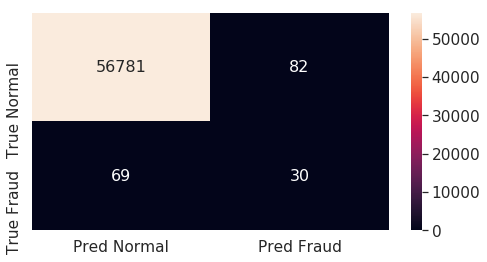

In [253]:
model_evaluate(ifo1,X_val,y_val1)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


time :  1.9843943119049072
accuracy :  0.9973842210596539
sensitivity :  0.2857142857142857
specifity :  0.9986107203151379
precision :  0.2616822429906542
recall :  0.2857142857142857
f1 score :  0.2731707317073171
Confusion matrix
TP =  28 FP =  79 FN =  70 TN =  56785


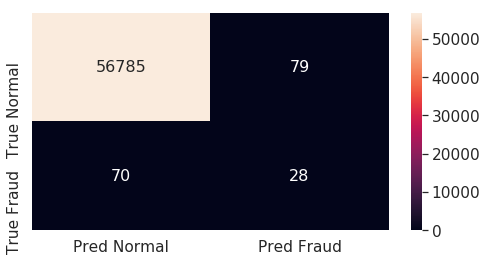

In [254]:
model_evaluate(ifo1, X_test, y_test1)

In [0]:
# model_evaluate(ifo1, X_train, y_train)

In [0]:
# ifoifo1 = model(df_data, th)
# model_evaluate(ifoifo1, df_data,y)

In [0]:
# model_evaluate(ifoifo1, X_train,y_train)

In [0]:
# model_evaluate(ifoifo1,X_test,y_test)

## percobaan 2
    membuat model menggunakan data training yang di klusterisasi terlebih dahulu

In [0]:
kmeans_data = scaler.fit_transform(X_train)
pca=PCA(n_components=2).fit(kmeans_data)
pca2dkmeans = pca.transform(kmeans_data)
# plt.figure(figsize=(10, 8))
# plt.scatter(pca2dkmeans[:,0], pca2dkmeans[:,1], c=y_train, cmap='Spectral')

In [0]:
kmeans_cc = KMeans(n_clusters=2, random_state=1).fit(kmeans_data)

In [0]:
X_kmeans = X_train.copy()
X_kmeans['cluster'] = kmeans_cc.labels_

ytrain_km = y_train.copy()
ytrain_km['cluster'] = kmeans_cc.labels_

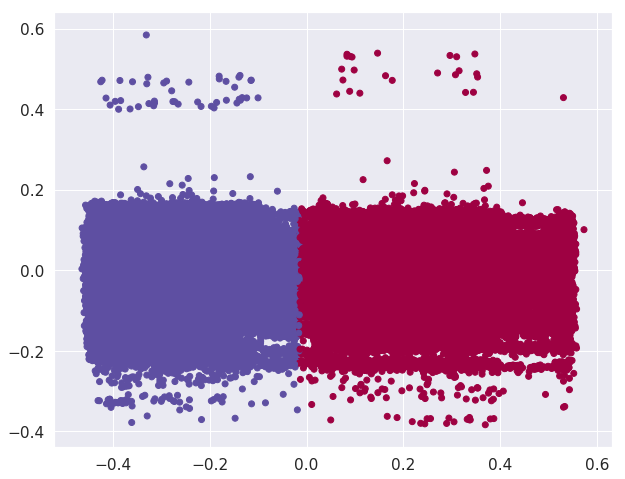

In [262]:
plt.figure(figsize=(10, 8))
plt.scatter(pca2dkmeans[:,0], pca2dkmeans[:,1], c=X_kmeans['cluster'], cmap='Spectral')

In [0]:
# clust1 = X_kmeans.loc[X_kmeans['cluster']==0]
# y1 = clust1['Class']
# clus1=clust1.drop(['Class', 'cluster'], axis=1)

# clust2 = X_kmeans.loc[X_kmeans['cluster']==1]
# y2 = clust2['Class']
# clus2=clust2.drop(['Class', 'cluster'], axis=1)

clust1 = X_kmeans.loc[X_kmeans['cluster']==0]
y1 = ytrain_km.loc[ytrain_km['cluster']==0]
# y_c1 = y1.drop(['cluster'], axis=1)
clus1=clust1.drop(['cluster'], axis=1)

clust2 = X_kmeans.loc[X_kmeans['cluster']==1]
y2 = ytrain_km.loc[ytrain_km['cluster']==1]
# y_c2 = y2.drop(['cluster'], axis=1)
clus2=clust2.drop(['cluster'], axis=1)

## cluster 1

In [0]:
# X1_train, X1_test, y1_train, y1_test = train_test_split(clus1, y1, test_size=0.3, random_state=42)

In [0]:
# print('X1_train=',len(X1_train),'X1_test=',len(X1_test))

In [266]:
len(clus1)

91863

In [267]:
aby1_train = y1.loc[y1==1]
print('ab train=',len(aby1_train))

ab train= 194


In [268]:
th1_train= len(aby1_train)/len(y1)
# th1_test= len(aby1_test)/len(X1_test)
print('th train=',th1_train)

th train= 0.0021118404580734353


In [0]:
# hasil_c1 = []
# iterasi = 0
# for ntree in [50, 100, 150, 200, 250]:
#   for sample in [50, 100, 200, 256, 500]:
#     ts = time.time()
#     ifor = iForest(X_train, ntree, sample, th_train)
#     tf = time.time()
#     waktu = tf-ts
#     accuracy,sensitivity,specifity,precision,recall,f1_score = eval_model(ifor, X_val, y_val1)
#     result = [ntree, sample, accuracy, sensitivity, specifity, precision, recall, f1_score, waktu]
#     hasil_c1.append(result)
#     iterasi = iterasi+1
#     print('progress = ',iterasi,'/ 25')

In [0]:
# df_resultc1 = pd.DataFrame(data= hasil, columns=['nTree','Sample','Akurasi','Sensitivity','Specifity','precision','recall','f1_score','Waktu'])
# df_result.insert(loc=0, column='No', value=list(range(1,df_result.shape[0]+1)))
# df_result = df_result.set_index('No')

# del df_result.index.name

# df_resultc1

In [0]:
# best = df_result['f1_score'].max() 
# terbaik = df_result[df_result['f1_score']==best]
# terbaik

In [284]:
nTree = 100
sample = 256
ifoc1 = iForest(clus1, nTree, sample, th_train)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


time :  2.660144329071045
accuracy :  0.997542221129876
sensitivity :  0.25252525252525254
specifity :  0.9988393155478958
precision :  0.27472527472527475
recall :  0.25252525252525254
f1 score :  0.26315789473684215
Confusion matrix
TP =  25 FP =  66 FN =  74 TN =  56797


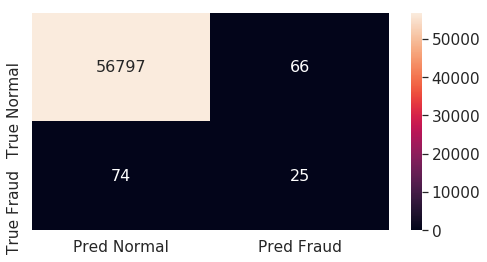

In [285]:
model_evaluate(ifoc1, X_val, y_val1)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


time :  2.600975275039673
accuracy :  0.9976826656367402
sensitivity :  0.2653061224489796
specifity :  0.9989448508722566
precision :  0.3023255813953488
recall :  0.2653061224489796
f1 score :  0.28260869565217395
Confusion matrix
TP =  26 FP =  60 FN =  72 TN =  56804


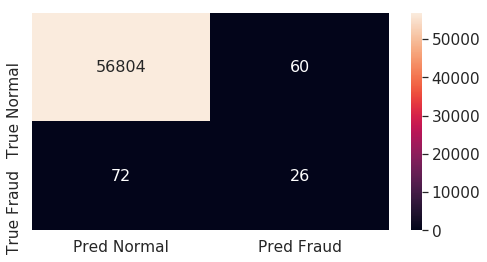

In [286]:
model_evaluate(ifoc1, X_test, y_test1)

In [0]:
# filename = 'iForest_cluster1_model.sav'
# joblib.dump(ifoc1, filename)

## cluster 2

In [0]:
# X2_train, X2_test, y2_train, y2_test = train_test_split(clus2, y2, test_size=0.3, random_state=42)
# len(y_test)

In [277]:
len(clus2)

79020

In [278]:
aby2_train = y2.loc[y2==1]
# aby2_test = y2_test[y2_test==1]
print('ab train=',len(aby2_train))

ab train= 101


In [279]:
th2_train= len(aby2_train)/len(clus2)
# th2_test= len(aby2_test)/len(X2_test)
print('th train=',th2_train)

th train= 0.001278157428499114


In [287]:
ifoc2 = iForest(clus2,nTree,sample,th_train)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


time :  2.590376853942871
accuracy :  0.9966644429619747
sensitivity :  0.32323232323232326
specifity :  0.9978369062483513
precision :  0.2064516129032258
recall :  0.32323232323232326
f1 score :  0.25196850393700787
Confusion matrix
TP =  32 FP =  123 FN =  67 TN =  56740


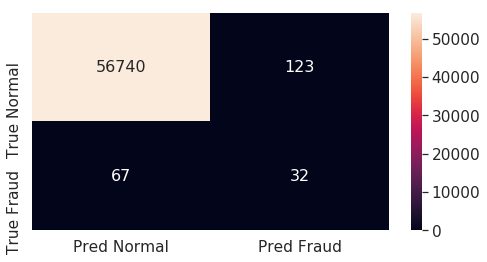

In [288]:
model_evaluate(ifoc2, X_val, y_val1)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


time :  2.5646820068359375
accuracy :  0.9968399985955549
sensitivity :  0.32653061224489793
specifity :  0.9979952166572875
precision :  0.2191780821917808
recall :  0.32653061224489793
f1 score :  0.26229508196721313
Confusion matrix
TP =  32 FP =  114 FN =  66 TN =  56750


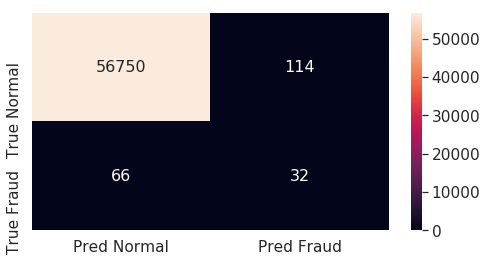

In [289]:
model_evaluate(ifoc2, X_test, y_test)

In [0]:
# filename = 'iForest_cluster2_model.sav'
# joblib.dump(ifoc2, filename)